# importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# reading files

In [2]:
train_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")  
test_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")  
X = train_df.drop(columns=["purchaseValue"])
y = train_df["purchaseValue"]

# preprocessing data-removing constant features/features with high number of missing values and high cardinality and EDA

In [3]:
columns=X.columns.tolist()

trafficSource.isTrueDirect 73133
browser 0
device.screenResolution 0
trafficSource.adContent 113060
trafficSource.keyword 71861
screenSize 0
geoCluster 0
trafficSource.adwordsClickInfo.slot 111742
device.mobileDeviceBranding 0
device.mobileInputSelector 0
userId 0
trafficSource.campaign 0
device.mobileDeviceMarketingName 0
geoNetwork.networkDomain 0
gclIdPresent 0
device.operatingSystemVersion 0
sessionNumber 0
device.flashVersion 0
geoNetwork.region 0
trafficSource 0
totals.visits 0
geoNetwork.networkLocation 0
sessionId 0
os 0
geoNetwork.subContinent 0
trafficSource.medium 0
trafficSource.adwordsClickInfo.isVideoAd 111742
browserMajor 0
locationCountry 0
device.browserSize 0
trafficSource.adwordsClickInfo.adNetworkType 111742
socialEngagementType 0
geoNetwork.city 0
trafficSource.adwordsClickInfo.page 111742
geoNetwork.metro 0
pageViews 8
locationZone 0
device.mobileDeviceModel 0
trafficSource.referralPath 73309
totals.bounces 68875
date 0
device.language 0
deviceType 0
userChannel 0

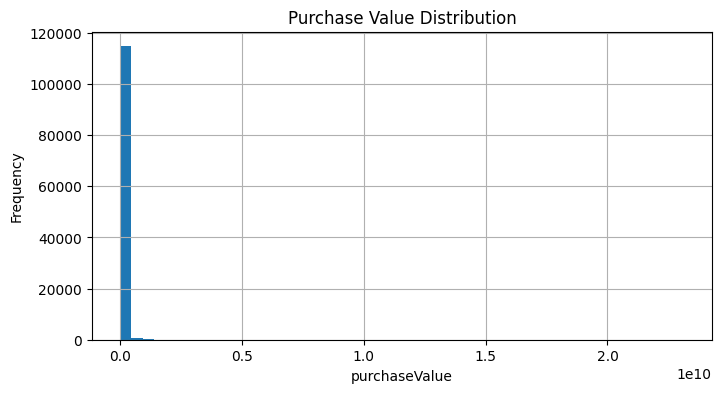

Zero Purchase Percentage: 79.33%


In [4]:
for col in columns:
   print(col,X[col].isna().sum())
    
plt.figure(figsize=(8, 4))
train_df['purchaseValue'].hist(bins=50)
plt.title('Purchase Value Distribution')
plt.xlabel('purchaseValue')
plt.ylabel('Frequency')
plt.show()

print(f"Zero Purchase Percentage: {(train_df['purchaseValue'] == 0).mean() * 100:.2f}%")

In [5]:
constant_cols = X.columns[X.nunique() <= 1]
print(f"\nColumns with Zero Variance (Constant Columns): {list(constant_cols)}")


Columns with Zero Variance (Constant Columns): ['trafficSource.isTrueDirect', 'device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'totals.bounces', 'device.language', 'device.browserVersion', 'device.screenColors', 'new_visits']


In [6]:
for col in constant_cols:
    print(X[col].value_counts())

trafficSource.isTrueDirect
True    42890
Name: count, dtype: int64
device.screenResolution
not available in demo dataset    116023
Name: count, dtype: int64
screenSize
medium    116023
Name: count, dtype: int64
device.mobileDeviceBranding
not available in demo dataset    116023
Name: count, dtype: int64
device.mobileInputSelector
not available in demo dataset    116023
Name: count, dtype: int64
device.mobileDeviceMarketingName
not available in demo dataset    116023
Name: count, dtype: int64
device.operatingSystemVersion
not available in demo dataset    116023
Name: count, dtype: int64
device.flashVersion
not available in demo dataset    116023
Name: count, dtype: int64
totals.visits
1    116023
Name: count, dtype: int64
geoNetwork.networkLocation
not available in demo dataset    116023
Name: count, dtype: int64
trafficSource.adwordsClickInfo.isVideoAd
False    4281
Name: count, dtype: int64
browserMajor
not available in demo dataset    116023
Name: count, dtype: int64
device.browserSi

In [7]:
X=X.drop(columns=constant_cols,errors='ignore')
test_df=test_df.drop(columns=constant_cols,errors='ignore')

In [8]:
columns=X.columns.tolist()
cols_to_drop1 = [col for col in columns if X[col].nunique() == 1]
X.drop(cols_to_drop1,axis=1, inplace=True)
test_df.drop(cols_to_drop1,axis=1, inplace=True)
columns=X.columns.tolist()
cols_to_drop2 = [col for col in columns if X[col].isna().sum()>(len(X[col])*0.5)]
X.drop(cols_to_drop2,axis=1, inplace=True)
test_df.drop(cols_to_drop2,axis=1, inplace=True)
#X.head(1)

In [9]:
X.isna().sum()

browser                     0
geoCluster                  0
userId                      0
trafficSource.campaign      0
geoNetwork.networkDomain    0
gclIdPresent                0
sessionNumber               0
geoNetwork.region           0
trafficSource               0
sessionId                   0
os                          0
geoNetwork.subContinent     0
trafficSource.medium        0
locationCountry             0
geoNetwork.city             0
geoNetwork.metro            0
pageViews                   8
date                        0
deviceType                  0
userChannel                 0
totalHits                   0
sessionStart                0
geoNetwork.continent        0
device.isMobile             0
dtype: int64

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


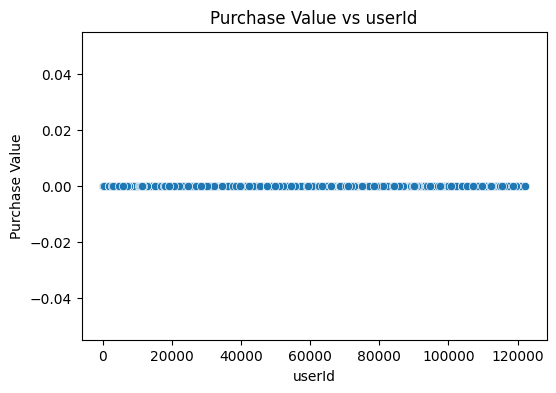

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


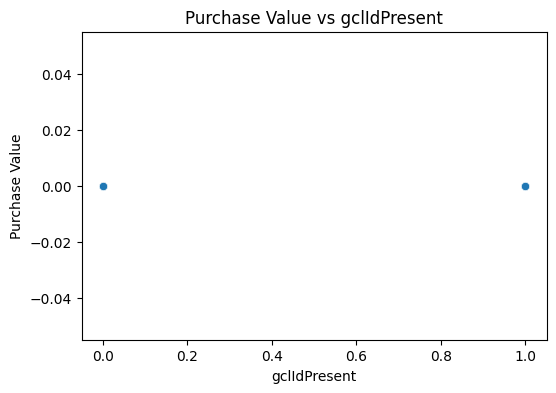

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


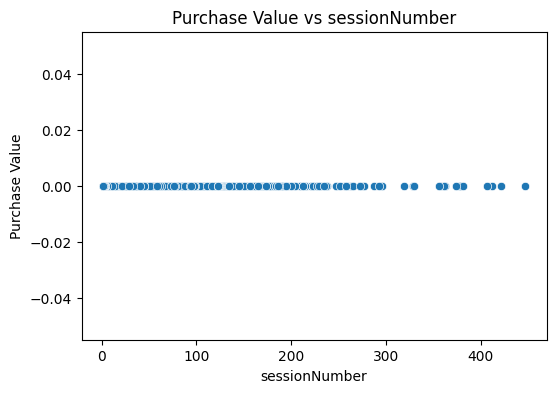

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


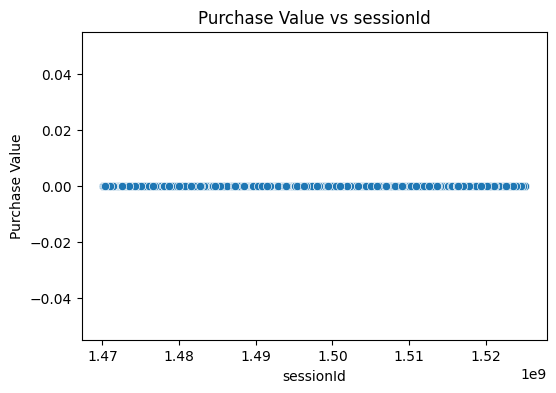

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


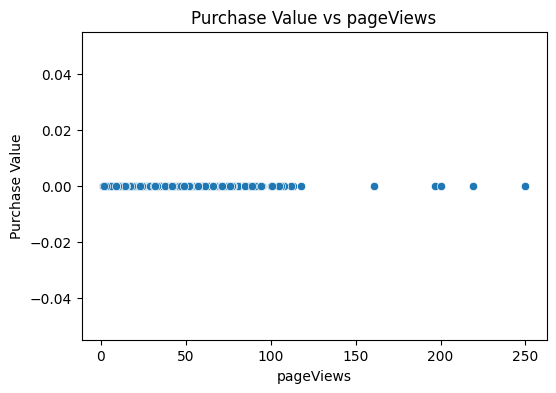

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


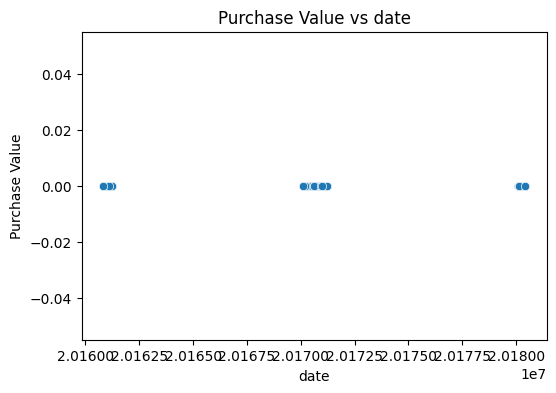

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


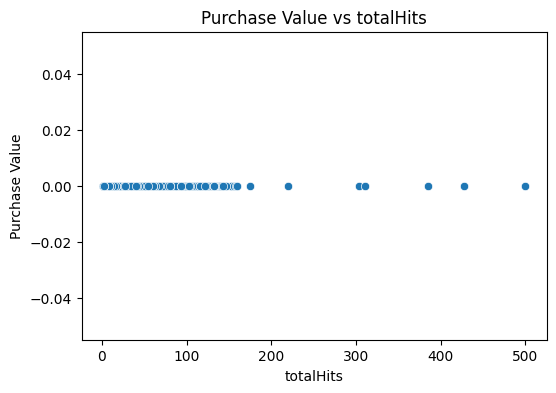

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


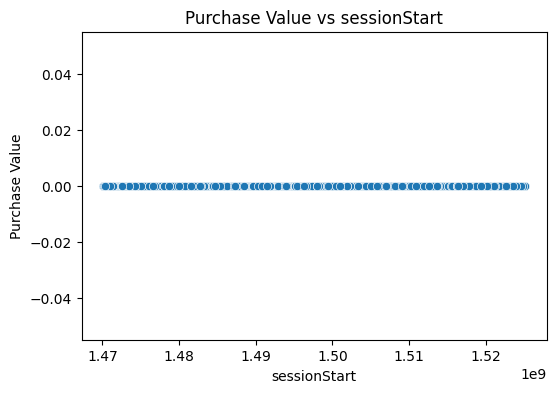

In [11]:
#target v/s numeric columns
for col in numerical_cols :
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=np.expm1(y))  # Inverse-transform target for readability
    plt.title(f'Purchase Value vs {col}')
    plt.xlabel(col)
    plt.ylabel('Purchase Value')
    plt.show()

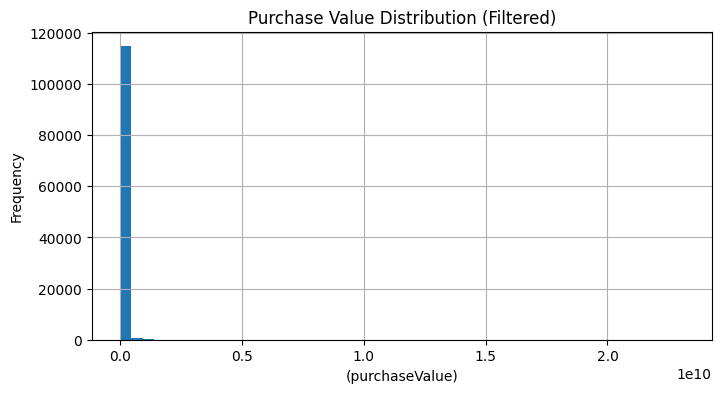

In [12]:
#Purchase Value Distribution (Post-filter)
plt.figure(figsize=(8, 4))
y.hist(bins=50)
plt.title('Purchase Value Distribution (Filtered)')
plt.xlabel('(purchaseValue)')
plt.ylabel('Frequency')
plt.show()

# Preprocessor Pipeline :for handling processing(imputing and scaling)numerical data and (imputing and encoding)categorical data

In [13]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Dataset splitting into training and validation datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# Classifier Model:separating non purchase vs purchase data

In [15]:
y_train_class = (y_train > 0).astype(int)
y_test_class = (y_test > 0).astype(int)

In [16]:
#Logistic Regression
'''logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced', 
        max_iter=500,
        random_state=39
    ))
])
logreg_model=logreg_pipeline.fit(X_train, y_train_class)
logreg_preds = logreg_model.predict(X_test)
print(classification_report(y_test_class, logreg_preds))
print(confusion_matrix(y_test_class, logreg_preds))'''

"logreg_pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('classifier', LogisticRegression(\n        class_weight='balanced', \n        max_iter=500,\n        random_state=39\n    ))\n])\nlogreg_model=logreg_pipeline.fit(X_train, y_train_class)\nlogreg_preds = logreg_model.predict(X_test)\nprint(classification_report(y_test_class, logreg_preds))\nprint(confusion_matrix(y_test_class, logreg_preds))"

In [17]:
#RandomForestClassifier
'''
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        n_estimators=100,
        max_depth=25,
        random_state=39
    ))
])
rf_model=rf_pipeline.fit(X_train, y_train_class)
rf_preds = rf_model.predict(X_test)
print(classification_report(y_test_class, rf_preds))
print(confusion_matrix(y_test_class, rf_preds))'''

"\nrf_pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('classifier', RandomForestClassifier(\n        class_weight='balanced',\n        n_estimators=100,\n        max_depth=25,\n        random_state=39\n    ))\n])\nrf_model=rf_pipeline.fit(X_train, y_train_class)\nrf_preds = rf_model.predict(X_test)\nprint(classification_report(y_test_class, rf_preds))\nprint(confusion_matrix(y_test_class, rf_preds))"

In [18]:
#XGBoostClassifier
neg = sum(y_train_class == 0)
pos = sum(y_train_class == 1)
scale_pos_weight = neg / pos
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=200,
        max_depth=15,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=39
    ))
])
xgb_pipeline.fit(X_train, y_train_class)
xgb_preds = xgb_pipeline.predict(X_test)
xgb_preds_test=xgb_pipeline.predict(test_df)
print(classification_report(y_test_class, xgb_preds))
print(confusion_matrix(y_test_class,xgb_preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18367
           1       0.91      0.97      0.91      4838

    accuracy                           0.98     23205
   macro avg       0.93      0.96      0.95     23205
weighted avg       0.97      0.96      0.96     23205

[[17641   726]
 [  148  4690]]


In [19]:
'''from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 15),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__gamma': uniform(0, 5),
    'classifier__min_child_weight': randint(1, 10)
}
search = RandomizedSearchCV(xgb_pipeline, param_dist, n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
search.fit(X_train, y_train_class)
xgb_tuned_preds = xgb_pipeline.predict(X_test)
#xgb_tuned_preds_test=xgb_pipeline.predict(test_df)
print(classification_report(y_test_class, xgb_tuned_preds))
print(confusion_matrix(y_test_class,xgb_tuned_preds))'''

"from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import uniform, randint\n\nparam_dist = {\n    'classifier__n_estimators': randint(100, 500),\n    'classifier__max_depth': randint(3, 15),\n    'classifier__learning_rate': uniform(0.01, 0.3),\n    'classifier__subsample': uniform(0.5, 0.5),\n    'classifier__colsample_bytree': uniform(0.5, 0.5),\n    'classifier__gamma': uniform(0, 5),\n    'classifier__min_child_weight': randint(1, 10)\n}\nsearch = RandomizedSearchCV(xgb_pipeline, param_dist, n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)\nsearch.fit(X_train, y_train_class)\nxgb_tuned_preds = xgb_pipeline.predict(X_test)\n#xgb_tuned_preds_test=xgb_pipeline.predict(test_df)\nprint(classification_report(y_test_class, xgb_tuned_preds))\nprint(confusion_matrix(y_test_class,xgb_tuned_preds))"

In [20]:
purchase_training_indices = np.where(y_train >0)[0]
purchase_validation_indices=np.where(y_test >0)[0]
purchase_test_indices=np.where(xgb_preds_test == 1)[0]
X_train_positive = X_train.iloc[purchase_training_indices]
y_train_positive = y_train.iloc[purchase_training_indices]
X_validate_positive=X_test.iloc[purchase_validation_indices]
y_validate_positive=y_test.iloc[purchase_validation_indices]
X_test_indices=test_df.iloc[purchase_test_indices]

In [21]:
#X_train_positive.head(1)

# Regressor Model:For predicting values of the purchase(as determined by the classifier model)

In [22]:
quantile_array=[0.80,0.85,0.90, 0.95, 0.98, 0.99, 0.995, 0.999]
quantiles = y_train_positive.quantile(quantile_array)
print(quantiles)

0.800    1.309700e+08
0.850    1.769330e+08
0.900    2.639920e+08
0.950    4.787500e+08
0.980    8.634212e+08
0.990    1.234685e+09
0.995    1.695369e+09
0.999    5.482296e+09
Name: purchaseValue, dtype: float64


In [23]:
for quantile in quantile_array:
    threshold = y_train_positive.quantile(quantile)
    count_above_threshold = (y_train_positive > threshold).sum()
    print(quantile,":",count_above_threshold)

0.8 : 3830
0.85 : 2872
0.9 : 1915
0.95 : 957
0.98 : 383
0.99 : 192
0.995 : 96
0.999 : 20


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Positive Purchase Values')

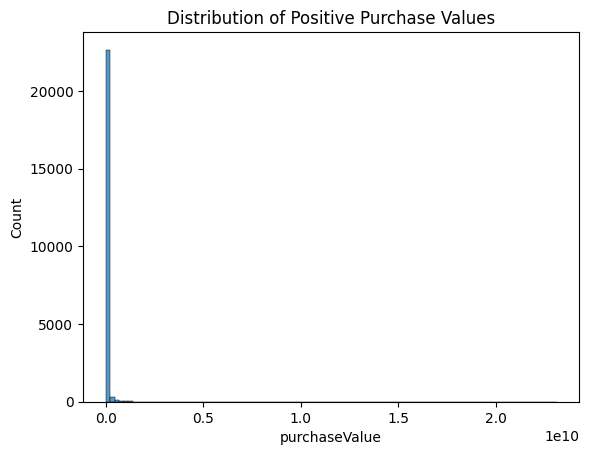

In [24]:
sns.histplot(y_test, bins=100)
plt.title("Distribution of Positive Purchase Values")

In [25]:
#threshold=y_train_positive.quantile(0.95)
#X_train_positive = X_train_positive[~(X_train_positive > threshold).all(axis=1)]

In [26]:
'''lgbm = LGBMRegressor(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.25,
    max_depth=25,
    min_samples_leaf=15,
)

lgbm_pipe=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgbm)])

lgbm_pipe.fit(X_train_positive,y_train_positive)
y_pred_lgbm= lgbm_pipe.predict(X_validate_positive)
rmselgbm = mean_squared_error(y_validate_positive, y_pred_lgbm,squared=False)
r2lgbm = r2_score(y_validate_positive, y_pred_lgbm)
print(r2lgbm,rmselgbm)'''

"lgbm = LGBMRegressor(\n    random_state=42,\n    n_estimators=1000,\n    learning_rate=0.25,\n    max_depth=25,\n    min_samples_leaf=15,\n)\n\nlgbm_pipe=Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('regressor', lgbm)])\n\nlgbm_pipe.fit(X_train_positive,y_train_positive)\ny_pred_lgbm= lgbm_pipe.predict(X_validate_positive)\nrmselgbm = mean_squared_error(y_validate_positive, y_pred_lgbm,squared=False)\nr2lgbm = r2_score(y_validate_positive, y_pred_lgbm)\nprint(r2lgbm,rmselgbm)"

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.15,
    max_depth=15,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)
gb_pipe=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb)])
gb_pipe.fit(X_train_positive,y_train_positive)
y_pred_gb= gb_pipe.predict(X_validate_positive)
rmsegb = mean_squared_error(y_validate_positive, y_pred_gb,squared=False)
r2gb = r2_score(y_validate_positive, y_pred_gb)
print(r2gb,rmsegb)

0.8441962743690793 260718375.01214176


# Compiling the Classifier and Regressor results for the test dataset and submission

In [28]:
X_test_pos = test_df[xgb_preds_test== 1]
y_pred = gb_pipe.predict(X_test_pos)

In [29]:
final_preds = np.zeros(len(test_df))
final_preds[xgb_preds_test == 1] = y_pred

In [30]:
submission_df = pd.DataFrame({
    'id': range(len(test_df)),
    'purchaseValue': final_preds
})
submission_df.to_csv("submission.csv", index=False)
print("Submission file saved")

Submission file saved
